# Regression Models

Linear regression is the most basic machine learning model. Given a set $N$ data points $(x_i, y_i)$, the objective is determine the most optimal value of the parameters $m$ and $b$ in $\hat{y_i} = mx_i + b$ which approximates the data to the best degree. The most convenient objective function $J(\theta)$ is the that of the mean squared error (MSE) loss,

$$J(\mathbf{\hat{y}}, \mathbf{y}) = \frac{1}{N} \sum^{N}_{i=1} (y_i - \hat{y_i})^2.$$

In which, $\hat{y_i}$ is our model prediction and $y_i$ is the ground truth or target for the $i$-th example. Gradient descent can be used find the parameters $m$ and $b$ for which the MSE loss is minimised. In our simple case, the components of the gradient are, 

$$
\frac{\partial J}{\partial m} =  -\frac{2}{N} \sum_{i=1}^{N} x_i (y_i - \hat{y_i}) 
\qquad 
\frac{\partial J}{\partial b} =  -\frac{2}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})
$$

However, more commonly, the $m$ and $b$ which mimimise the loss are computed through an analytic solution found by setting $\partial J / \partial m = 0$ and $\partial J / \partial b = 0$ and solving the resulting system of equations. The solution yields the minimisation parameters $\hat{m}$ and $\hat{b}$ is, 

$$
\hat{m} = \frac{\mu[X]\mu[Y]-\mu[X, Y]}{\mu[X]^2-\mu[X^2]},
\qquad
\hat{b} = \mu[Y]-\hat{m}\mu[X].
$$

Note that $\hat{m}$ must be calculated first to determine $\hat{b}$. In the formulae, we have used the notation $\mu[x]$ to denote the the mean of all $x_i$ and in general we have $\mu[f(X, Y)] = (1/N) \sum{f(x_i, y_i)}$. In More generally, our linear model can have $K$ number of features such that $\hat{y_i} = \beta_0 + \beta_1 x_i^{(1)} + \beta_2 x_i^{(2)} + ... + + \beta_K x_i^{(K)}$. The components of the gradient are then given via,

$$
\frac{\partial J}{\partial \beta_0} =  -\frac{2}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})
\qquad
\frac{\partial J}{\partial \beta_j} =  -\frac{2}{N} \sum_{i=1}^{N} x_i^{(j)} (y_i - \hat{y_i}) \ \forall \ j \neq 0.
$$

In which, $\beta_j$ denotes the associated parameter for the $j$-th feature.

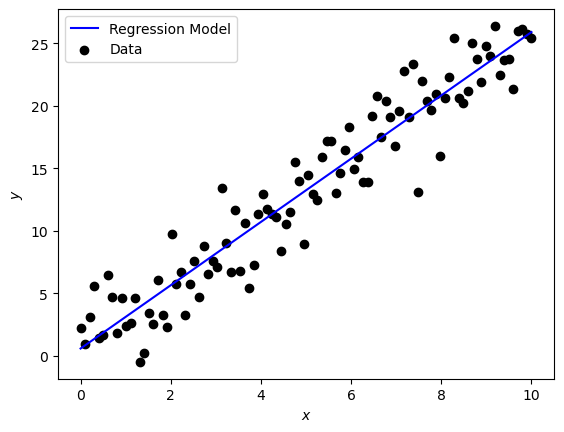

m: 2.53, b: 0.57


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def linear_regression(data, init_m, init_b, lr, epochs, verbose=False):

    # Unpacking data,
    x, y = data[0], data[1]
    N = len(data[0])
    m, b = init_m, init_b

    # Applying gradient descent,
    for i in range(epochs):
    
        # Computing model predictions,
        y_pred = m*x + b

        # Computing gradients,
        grad_m = (-2/N)*np.sum(x*(y-y_pred))
        grad_b = (-2/N)*np.sum(y-y_pred)

        # Update parameters,
        m = m - lr*grad_m
        b = b - lr*grad_b

        # Verbose,
        if verbose:
            print(f"epoch={i}, m={m}, b={b}")

    return m, b

# Random seed,
np.random.seed(42)

# Parameters,
m = 2.5
b = 1.0
N = 100
noise_std = 2.5

# Creating data,
x = np.linspace(0, 10, N)
noise = np.random.normal(0, noise_std, size=N)
y = m*x + b + noise
data = np.array([x, y])

# Creating linear regression model,
m_model, b_model = linear_regression(data=data, init_m=1, init_b=1, lr=0.01, epochs=1000)

# Computing predictions,
y_pred = m_model*data[0] + b_model

# Plotting,
plt.plot(data[0], y_pred, color="blue", label="Regression Model")
plt.scatter(data[0], data[1], color="black", label="Data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

# Printing,
print(f"m: {round(m_model, 2)}, b: {round(b_model, 2)}")

Now we use the analytic solution to fit the model $\hat{y_i} = mx_i + b$ for the data with gaussian noise,

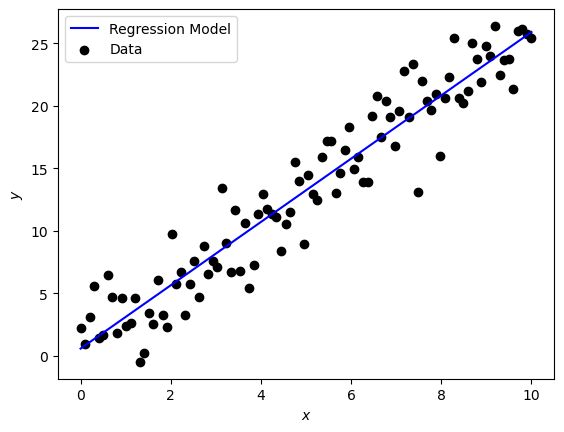

m: 2.53, b: 0.57


In [4]:
# Computing analytical solution,
x_mean = np.mean(data[0])
y_mean = np.mean(data[1])
xy_mean = np.mean(data[0]*data[1])
x2_mean = np.mean(data[0]**2)
m_model = (x_mean*y_mean - xy_mean)/(x_mean**2 - x2_mean)
b_model = y_mean - m_model*x_mean

# Computing predictions,
y_pred = m_model*data[0] + b_model

# Plotting,
plt.plot(data[0], y_pred, color="blue", label="Regression Model")
plt.scatter(data[0], data[1], color="black", label="Data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

# Printing,
print(f"m: {round(m_model, 2)}, b: {round(b_model, 2)}")